In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from astropy.table import Table

In [4]:
LSLGAdir = os.getenv('LSLGA_DIR')
galaxies = os.path.join(LSLGAdir, 'sample', 'CleanishSample43018.fits')

In [5]:
dat = Table.read(galaxies, format='fits')
df = dat.to_pandas()
df.head()

,galaxy,objtype,ra,dec,z,zqual,morph,mag,mag_err,mag_band,d25,d25_band,ba25,ba25_band,pa,pa_band,notes
0,SDSS J025901.06+005350.3,G,44.754542,0.897278,0.134638,N/A,N/A,17.450541,NaN,r,0.377500,r,0.532,r,134.0,r,N/A
1,SDSS J025831.82+002854.7,G,44.632583,0.481889,0.193223,N/A,N/A,17.678623,0.149580,r,0.211500,r,0.759,r,40.0,r,N/A
2,SDSS J030022.98+010354.8,G,45.095792,1.065250,0.165026,SPEC,N/A,18.496580,0.149465,r,0.200500,r,0.615,r,167.0,r,N/A
3,SDSS J030014.73+003044.9,G,45.061417,0.512472,0.162356,SPEC,N/A,18.519279,0.184103,r,0.199500,r,0.563,r,52.0,r,N/A
4,SDSS J025910.53+004416.3,G,44.793875,0.737917,0.190430,SPEC,N/A,17.896499,0.149229,r,0.180833,r,0.929,r,31.0,r,N/A


In [6]:
np.unique(df.d25_band)

array(['B_ESO', 'B_RC3', 'Ks', 'r'], dtype=object)

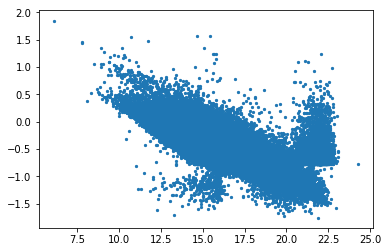

In [7]:
plt.scatter(df.mag, np.log10(df.d25), s=5)

In [8]:
beso = df[df.d25_band=='B_ESO']
brc3 = df[df.d25_band=='B_RC3']
Ks = df[df.d25_band=='Ks']
rband = df[df.d25_band=='r']
twomasx = df[df['galaxy'].str.contains('2MASX')]
sdss = df[df['galaxy'].str.contains('SDSS')]

Text(0,0.5,'$log_{10}$ Angular Diameter')

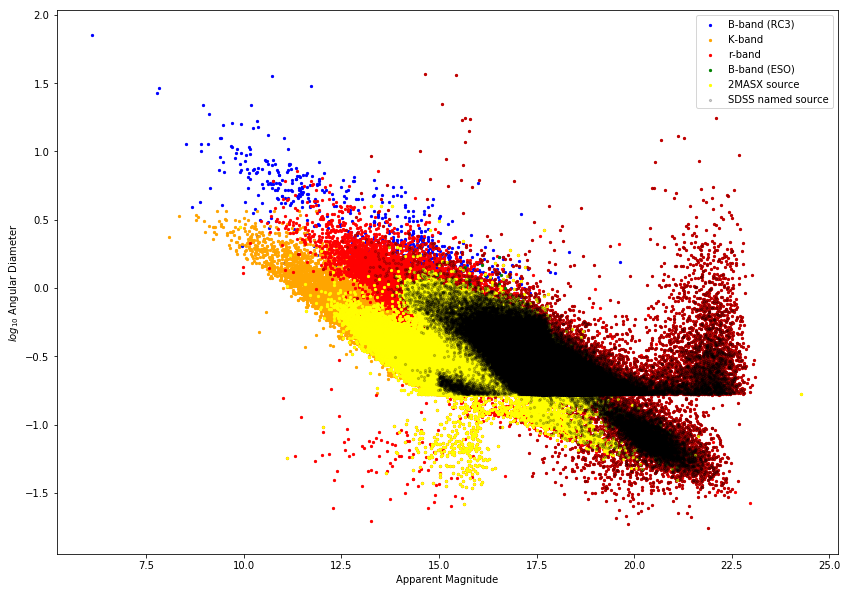

In [9]:
plt.figure(figsize=(14,10))
plt.scatter(brc3.mag, np.log10(brc3.d25), s=5, color='blue', label='B-band (RC3)')
plt.scatter(Ks.mag, np.log10(Ks.d25), s=5, color='orange', label='K-band')
plt.scatter(rband.mag, np.log10(rband.d25), s=5, color='red', label='r-band')
plt.scatter(beso.mag, np.log10(beso.d25), s=5, color='green', label='B-band (ESO)')
plt.scatter(twomasx.mag, np.log10(twomasx.d25), s=5, color='yellow', label='2MASX source')
plt.scatter(sdss.mag, np.log10(sdss.d25), s=5, color='black', alpha = 0.2, label='SDSS named source')
plt.legend()
plt.xlabel('Apparent Magnitude')
plt.ylabel(r'$log_{10}$ Angular Diameter')

In [10]:
np.log10(1/6)

-0.77815125038364363

In [11]:
cuts = df[df.d25<(1/6)]

In [12]:
cuts.head()

,galaxy,objtype,ra,dec,z,zqual,morph,mag,mag_err,mag_band,d25,d25_band,ba25,ba25_band,pa,pa_band,notes
104,SDSS J025955.48+000711.5,G,44.981208,0.119889,-0.001485,SPEC,N/A,20.989118,NaN,r,0.057167,r,0.718,r,91.0,r,N/A
116,2MASX J03003220+0031027,G,45.134125,0.517278,0.169937,N/A,N/A,17.476565,0.300571,r,0.150000,r,0.938,r,168.0,r,N/A
127,SDSS J025819.33+002527.6,G,44.580542,0.424361,0.260701,SPEC,N/A,19.267276,NaN,r,0.138500,r,0.744,r,112.0,r,N/A
141,2MASX J03003134+0102095,G,45.130583,1.036056,0.071529,N/A,N/A,17.194637,0.134781,r,0.128167,r,0.819,r,28.0,r,N/A
194,SDSS J030139.53+010910.6,G,45.414708,1.152972,0.479940,SPEC,N/A,20.110315,NaN,r,0.099667,r,0.634,r,53.0,r,N/A


Text(0,0.5,'$log_{10}$ Angular Diameter')

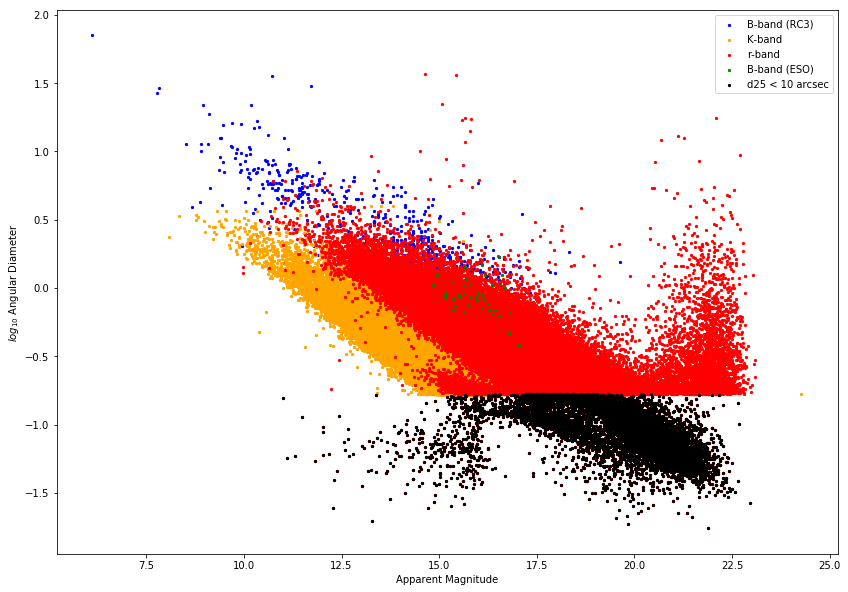

In [13]:
plt.figure(figsize=(14,10))
plt.scatter(brc3.mag, np.log10(brc3.d25), s=5, color='blue', label='B-band (RC3)')
plt.scatter(Ks.mag, np.log10(Ks.d25), s=5, color='orange', label='K-band')
plt.scatter(rband.mag, np.log10(rband.d25), s=5, color='red', label='r-band')
plt.scatter(beso.mag, np.log10(beso.d25), s=5, color='green', label='B-band (ESO)')
plt.scatter(cuts.mag, np.log10(cuts.d25), s=5, color='black', label='d25 < 10 arcsec')
plt.legend()
plt.xlabel('Apparent Magnitude')
plt.ylabel(r'$log_{10}$ Angular Diameter')

In [14]:
wing = df[df.mag > 20.4]
wing.head()

,galaxy,objtype,ra,dec,z,zqual,morph,mag,mag_err,mag_band,d25,d25_band,ba25,ba25_band,pa,pa_band,notes
104,SDSS J025955.48+000711.5,G,44.981208,0.119889,-0.001485,SPEC,N/A,20.989118,NaN,r,0.057167,r,0.718,r,91.0,r,N/A
365,SDSS J025615.55+010742.7,G,44.064833,1.128556,0.730227,SPEC,N/A,20.463129,NaN,r,0.074333,r,0.643,r,151.0,r,N/A
1543,SDSS J015823.62+131326.1,G,29.598583,13.223972,0.623426,SPEC,N/A,21.507180,NaN,r,0.340500,r,0.027,r,66.0,r,N/A
1792,SDSS J015755.78+135207.7,G,29.482458,13.868833,0.725914,SPEC,N/A,21.123526,NaN,r,0.087000,r,0.297,r,102.0,r,N/A
10396,SDSS J031545.70-081848.7,G,48.940458,-8.313556,0.579380,N/A,N/A,21.882855,NaN,r,0.271667,r,0.271,r,105.0,r,N/A


Text(0,0.5,'$log_{10}$ Angular Diameter')

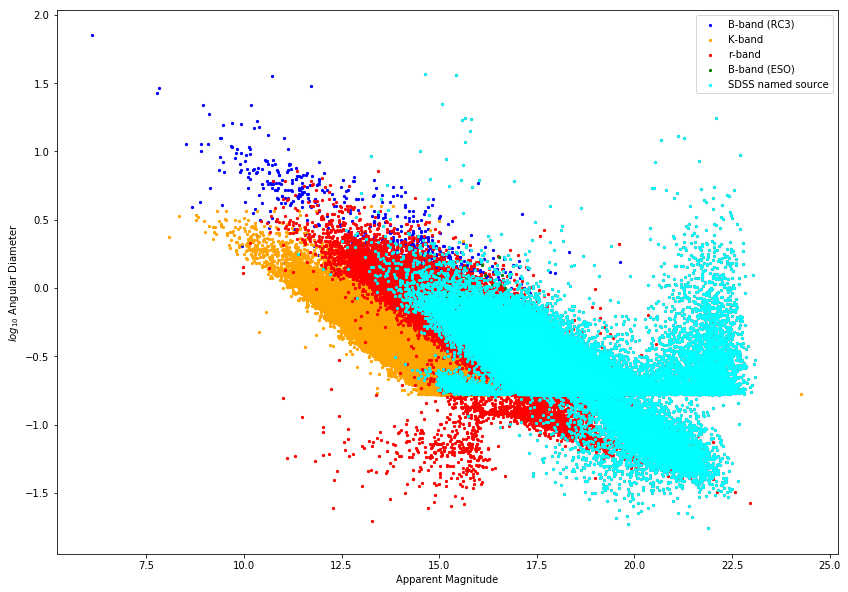

In [15]:
plt.figure(figsize=(14,10))
plt.scatter(brc3.mag, np.log10(brc3.d25), s=5, color='blue', label='B-band (RC3)')
plt.scatter(Ks.mag, np.log10(Ks.d25), s=5, color='orange', label='K-band')
plt.scatter(rband.mag, np.log10(rband.d25), s=5, color='red', label='r-band')
plt.scatter(beso.mag, np.log10(beso.d25), s=5, color='green', label='B-band (ESO)')
#plt.scatter(cuts.mag, np.log10(cuts.d25), s=5, color='black')
#plt.scatter(wing.mag, np.log10(wing.d25), s=5, color='black')
plt.scatter(sdss.mag, np.log10(sdss.d25), s=5, color='cyan', label='SDSS named source')
plt.legend()
plt.xlabel('Apparent Magnitude')
plt.ylabel(r'$log_{10}$ Angular Diameter')

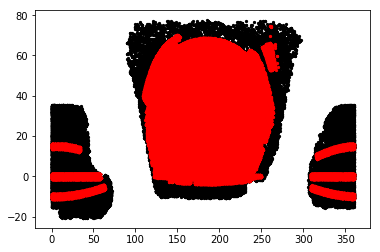

In [16]:
plt.scatter(df.ra, df.dec, s=5, color='black')
plt.scatter(wing.ra, wing.dec, s=5, color='yellow')
plt.scatter(sdss.ra, sdss.dec, s=5, color='red')

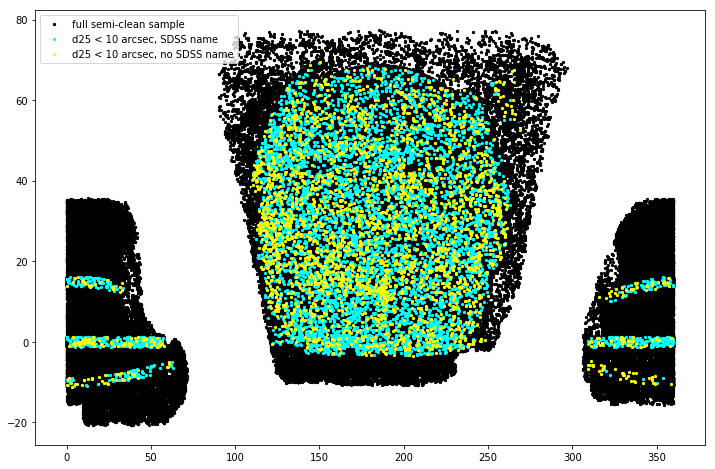

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(df.ra, df.dec, s=5, color='black', label='full semi-clean sample')
#plt.scatter(cuts.ra, cuts.dec, s=5, color='yellow', label='d25 < 10 arcsec')
plt.scatter(cuts[cuts['galaxy'].str.contains('SDSS')].ra, cuts[cuts['galaxy'].str.contains('SDSS')].dec, color='cyan', s=5, label='d25 < 10 arcsec, SDSS name')
plt.scatter(cuts[~cuts['galaxy'].str.contains('SDSS')].ra, cuts[~cuts['galaxy'].str.contains('SDSS')].dec, color='yellow', s=5, label='d25 < 10 arcsec, no SDSS name')
plt.legend(loc=2)

In [32]:
lownosdss = cuts[~cuts['galaxy'].str.contains('SDSS')]

In [34]:
len(lownosdss[lownosdss['galaxy'].str.contains('2MASX')])

2386

In [37]:
lowno2mas = lownosdss[lownosdss['galaxy'].str.contains('2MASX')]

In [41]:
lownosdss[~lownosdss['galaxy'].str.contains('2MASX')].head()

,galaxy,objtype,ra,dec,z,zqual,morph,mag,mag_err,mag_band,d25,d25_band,ba25,ba25_band,pa,pa_band,notes
12356,SARCS 050,G,36.442208,-7.627361,0.513798,SPEC,N/A,19.252154,NaN,r,0.104833,r,0.871,r,83.0,r,N/A
12463,NGC 1048A,G,40.148667,-8.547139,0.037546,N/A,SBb pec edge-on,12.654224,0.044808,Ks,0.092500,r,0.895,r,167.0,r,Multiple SDSS entries describe this object.
17285,CGCG 032-048,G,129.781917,4.567333,0.047502,N/A,N/A,16.768800,0.090606,r,0.137167,r,0.814,r,154.0,r,N/A
19357,NGC 2882,G,141.650583,7.954472,0.007182,N/A,S?,16.787255,0.043782,r,0.098000,r,0.900,r,100.0,r,Multiple SDSS entries describe this object.
19743,2MFGC 07180,G,138.558667,7.747083,0.031018,N/A,N/A,14.169763,0.122354,Ks,0.036833,r,0.787,r,63.0,r,SDSS has z = 0.079838 +- 0.000147. Mult. SDSS ...


In [42]:
puzzle = lownosdss[~lownosdss['galaxy'].str.contains('2MASX')]

In [46]:
len(puzzle[puzzle['notes'].str.contains('N/A')])

287

In [52]:
print(puzzle[~np.logical_or(puzzle['notes'].str.contains('N/A'), puzzle['notes'].str.contains('Mult'))].notes)

37444     Within the halo of a V~10 star 30" to  the north.
85099     FIRST source 12" NE. 2MASS source probably a s...
90871                                   TXS codes: lobes(C)
123103    MAPS position points to northwestern portion o...
150932                    Bright star 18" to the southwest.
161375                         Component 'b)' in UGC notes.
161950               MCG Declination is for MCG +09-18-030.
167095      Often confused with NGC 3690 in the literature.
173991                                  TXS codes: lobes(C)
182646    87GB source with large sky, narrow minor axis,...
226226                         Component 'a)' in UGC notes.
229974    MCG implies the R.A. is 08h34.0m; corrected in...
266385     VV has two (case sensitive) entries for VV 115a.
266422                     2010A&A...517A..75B give z=0.015
287854                   Noted as a possible "nest" in MCG.
319172           Several SDSS entries describe this object.
319266           Several SDSS entries de

In [54]:
puzzle[~np.logical_or(puzzle['notes'].str.contains('N/A'), puzzle['notes'].str.contains('Mult'))].notes.loc[667813]

'NGC gives only one pos. for N4809 & N4810. NED follows CGCG and RC2.'